In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

rs = np.random.seed(0)

In [2]:
train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [3]:
test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
test_data.head()

# species

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [4]:
X_train = train_data.drop(['species'], axis=1)
y_train = train_data.species

X_test = test_data.drop(['species'], axis=1)
y_test = test_data.species

In [8]:
max_depths = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    score = clf.score(X_train, y_train)
    accuracy_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'score': [score],
                                    'accuracy_score': [accuracy_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\2032677285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

In [9]:
scores_data.head()

,max_depth,score,accuracy_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [10]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                          value_vars=['score', 'accuracy_score'],
                          var_name='set_type', value_name='score')
scores_data_long.head()

C:\Users\aurrog\AppData\Local\Temp\ipykernel_7640\3118167635.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],


,max_depth,set_type,score
0,1,score,0.70
1,2,score,0.97
2,3,score,0.99
3,4,score,1.00
4,5,score,1.00


<Axes: xlabel='max_depth', ylabel='score'>

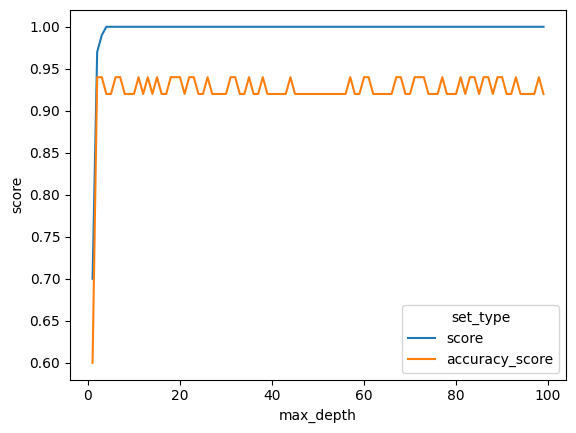

In [11]:
sns.lineplot(x='max_depth', y='score', data=scores_data_long, hue='set_type')

In [12]:
scores_data_long.head(30)

,max_depth,set_type,score
0,1,score,0.70
1,2,score,0.97
2,3,score,0.99
3,4,score,1.00
4,5,score,1.00
5,6,score,1.00
6,7,score,1.00
7,8,score,1.00
8,9,score,1.00
9,10,score,1.00
